In [1]:
import pandas as pd
from glob import glob
import itertools
from collections import Counter
import numpy as np
import math
import matplotlib.pylab as plt
import os
import networkx as nx
from pypinyin import lazy_pinyin
import sys
from collections import defaultdict, Counter
import networkx as nx
import pylab as plt
import matplotlib.cm as cm
import statsmodels.api as sm
from os import listdir
from scipy.stats.stats import pearsonr
import json
import random
from copy import deepcopy
import time
import scipy as sp
from scipy.sparse import csr_matrix
import matplotlib.cm as cm
from numpy.random import choice
from sklearn import manifold
import operator
from datetime import datetime as dt
import matplotlib.mlab as mlab
from scipy.stats import norm
import re
from scipy import stats
from scipy.spatial import Voronoi
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
import multiprocessing
import scipy.stats
import logging
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# media-centric & audience-centric

In [10]:
node=pd.read_csv('./node.csv',names=['user_id','app_name'],index_col=0)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
app_reach=node['app_name'].value_counts().reset_index(name='count')

In [15]:
app_reach['reach']=app_reach['count']/100000

In [33]:
len(app_reach)

266

In [39]:
app_df = pd.read_csv('./observed_value.csv',names=['node1','node2','app_obs','z_score','pair'])
app_df = app_df[['node1','node2','app_obs']]

app_df['app_obs']=app_df['app_obs']/100000

diction=dict(app_reach[['index','reach']].values)
app_df['app_exp']=app_df['node1'].apply(lambda x: diction[x]
                                     if x in diction
                                       else np.nan)*app_df['node2'].apply(lambda x: diction[x]
                                                                        if x in diction
                                                                        else np.nan)

In [47]:
len(app_df[app_df['app_obs']<app_df['app_exp']])

1699

In [46]:
len(app_df[app_df['app_obs']>app_df['app_exp']])

26834

In [48]:
app_df_act=app_df[app_df['app_obs']>app_df['app_exp']]

In [49]:
app_df_act.head()

,node1,node2,app_obs,app_exp
0,手机腾讯网,微信,0.71372,0.577218
1,QQ,微信,0.73178,0.595340
2,微信,熊猫桌面,0.02048,0.015567
3,微信,新浪微博,0.37542,0.300853
4,iTunes,微信,0.16789,0.128618


In [50]:
G=nx.Graph()
for i in app_df_act.index:
    G.add_edge(app_df_act.node1[i],app_df_act.node2[i], weight=app_df_act.app_obs[i])

In [51]:
degree_score=nx.degree_centrality(G)

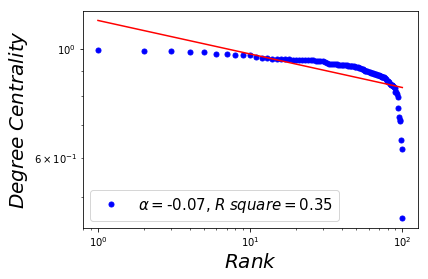

In [67]:
def powerlawplot (data):
    x=np.array(range(len(data)))+1
    y=np.array(sorted(data,reverse=True))
    x1=np.log(x)
    y1=np.log(y+10**(-10))
    xx=sm.add_constant(x1,prepend=True)
    res=sm.OLS(y1,xx).fit()
    constant,beta=res.params
    r2=res.rsquared
    plt.plot(x,y, "o",color='b',markersize=5, label='$\\alpha = $' + str(np.round(beta,2)) + ', ' + '$R\; square = $' + str(np.round(r2, 2)))
    plt.plot(x, np.exp(constant+x1*beta),"red")
    plt.legend(fontsize=15)
    plt.xscale('log'); 
    plt.yscale('log')
    plt.xlabel(r'$Rank$', fontsize = 20)
    plt.ylabel(r'$Degree\;Centrality$', fontsize = 20)

    
#     plt.savefig('./figureall.png',dpi=100)
    plt.show()
powerlawplot(sorted(list(degree_score.values())[:100],reverse=True))

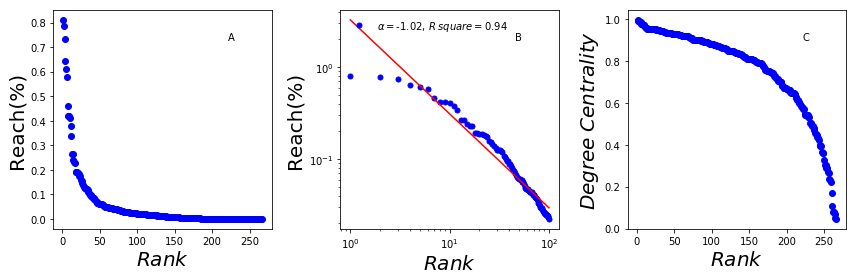

In [69]:
fig = plt.figure(figsize=(12, 4),facecolor='white')

ax = fig.add_subplot(131)
x=np.array(range(len(app_reach)))+1
y=np.array(sorted(app_reach['reach'],reverse=True))
plt.plot(x,y, "o",color='b')
plt.xlabel(r'$Rank$', fontsize = 20)
plt.ylabel('Reach(%)', fontsize = 20)
ax.text(0.8, 0.9,'A',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)

ax = fig.add_subplot(132)
def powerlawplot (data):
    x=np.array(range(len(data)))+1
    y=np.array(sorted(data,reverse=True))
    x1=np.log(x)
    y1=np.log(y+10**(-10))
    xx=sm.add_constant(x1,prepend=True)
    res=sm.OLS(y1,xx).fit()
    constant,beta=res.params
    r2=res.rsquared
    plt.plot(x,y, "o",color='b',markersize=5, label='$\\alpha = $' + str(np.round(beta,2)) + ', ' + '$R\; square = $' + str(np.round(r2, 2)))
    plt.plot(x, np.exp(constant+x1*beta),"red")
    plt.legend(fontsize=15)
    plt.xscale('log'); 
    plt.yscale('log')
    plt.xlabel(r'$Rank$', fontsize = 20)
    plt.ylabel('Reach(%)', fontsize = 20)
    plt.legend(loc=2,frameon=False)
    ax.text(0.8, 0.9,'B',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
powerlawplot(list(app_reach['reach'])[:100])


ax = fig.add_subplot(133)
x=np.array(range(len(degree_score)))+1
y=np.array(sorted(degree_score.values(),reverse=True))
plt.plot(x,y, "o",color='b')
plt.xlabel(r'$Rank$', fontsize = 20)
plt.ylabel(r'$Degree\;Centrality$', fontsize = 20)
ax.text(0.8, 0.9,'C',horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)




plt.tight_layout()
plt.savefig('./picture/app_reach.png',dpi=100)

plt.show()

# radius of gyration

In [105]:
def radius_of_gyration(positions):
    """
    position : tuple
        A tuple (lat, lon) with the latitude and longitude of the antenna,
        encoded as floating point numbers.

    Returns the radius of gyration, the *equivalent distance* of the mass from
    the center of gravity, for all visited places. [GON2008]_

    References
    ----------
    .. [GON2008] Gonzalez, M. C., Hidalgo, C. A., & Barabasi, A. L. (2008).
        Understanding individual human mobility patterns. Nature, 453(7196),
        779-782.
    """
    d = Counter(positions)
    sum_weights = sum(d.values())
    positions = list(d.keys())  # Unique positions

    if len(positions) == 0:
        return None

    barycenter = [0, 0]
    for pos, t in d.items():
        barycenter[0] += pos[0] * t
        barycenter[1] += pos[1] * t

    barycenter[0] /= sum_weights
    barycenter[1] /= sum_weights

    r = 0.
    for pos, t in d.items():
        r += float(t) / sum_weights * \
             great_circle_distance(barycenter, pos) ** 2
    return math.sqrt(r)


def great_circle_distance(pt1, pt2):
    """
    Return the great-circle distance in kilometers between two points,
    defined by a tuple (lat, lon).
    Examples
    --------
    >>> brussels = (50.8503, 4.3517)
    >>> paris = (48.8566, 2.3522)
    >>> great_circle_distance(brussels, paris)
    263.9754164080347
    """
    r = 6371.

    delta_latitude = math.radians(pt1[0] - pt2[0])
    delta_longitude = math.radians(pt1[1] - pt2[1])
    latitude1 = math.radians(pt1[0])
    latitude2 = math.radians(pt2[0])

    a = math.sin(delta_latitude / 2) ** 2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(
        delta_longitude / 2) ** 2
    return r * 2. * math.asin(math.sqrt(a))


# entropy

In [2]:
def contains(small, big):
    for i in range(len(big) - len(small) + 1):
        if (big[i:i + len(small)] == small).all():
            return True
    return False


def actual_entropy(l):
   
    n = len(l)

    sequence = np.array([l[0]])
    sum_gamma = 0

    for i in range(1, n):
        for j in range(i + 1, n + 1):
            s = l[i:j]
            if contains(s, sequence) != True:
                sum_gamma += len(s)
                sequence = np.append(sequence, l[i])
                break

    if sum_gamma == 0 or n == 0:
        return 0
    else:
        ae = 1 / (sum_gamma / n) * math.log(n)
        return ae
    
def entropy(data):
    p_data = np.array(list(Counter(data).values())) / len(data)  # calculates the probabilities
    entropy = scipy.stats.entropy(p_data)  # input probabilities to get the entropy
    return entropy


def radius_of_gyration(positions):
    """
    position : tuple
        A tuple (lat, lon) with the latitude and longitude of the antenna,
        encoded as floating point numbers.

    Returns the radius of gyration, the *equivalent distance* of the mass from
    the center of gravity, for all visited places. [GON2008]_

    References
    ----------
    .. [GON2008] Gonzalez, M. C., Hidalgo, C. A., & Barabasi, A. L. (2008).
        Understanding individual human mobility patterns. Nature, 453(7196),
        779-782.
    """
    d = Counter(positions)
    sum_weights = sum(d.values())
    positions = list(d.keys())  # Unique positions

    if len(positions) == 0:
        return None

    barycenter = [0, 0]
    for pos, t in d.items():
        barycenter[0] += pos[0] * t
        barycenter[1] += pos[1] * t

    barycenter[0] /= sum_weights
    barycenter[1] /= sum_weights

    r = 0.
    for pos, t in d.items():
        r += float(t) / sum_weights * \
             great_circle_distance(barycenter, pos) ** 2
    return math.sqrt(r)


def great_circle_distance(pt1, pt2):
    """
    Return the great-circle distance in kilometers between two points,
    defined by a tuple (lat, lon).
    Examples
    --------
    >>> brussels = (50.8503, 4.3517)
    >>> paris = (48.8566, 2.3522)
    >>> great_circle_distance(brussels, paris)
    263.9754164080347
    """
    r = 6371.

    delta_latitude = math.radians(pt1[0] - pt2[0])
    delta_longitude = math.radians(pt1[1] - pt2[1])
    latitude1 = math.radians(pt1[0])
    latitude2 = math.radians(pt2[0])

    a = math.sin(delta_latitude / 2) ** 2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(
        delta_longitude / 2) ** 2
    return r * 2. * math.asin(math.sqrt(a))


In [5]:
filenames=glob('./siteexample1/allusers_all/*.csv')

error=[]
user_entropy=[]
for file in filenames:
    try:

        uid = file.split('/')[-1].split('.')[0]
        userdata=pd.read_csv(file,names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])


        userdata['start_time_hour'] = userdata['start_time'].apply(lambda x: int(x / 10000))
        userdata = userdata[['start_time_hour', 'longtitude', 'latitude']].dropna()
        userdata['location'] = (userdata['longtitude'].astype('str') + ',' + userdata['latitude'].astype('str')).values
        N = len(set(userdata['location']))
        E = entropy(userdata['location'])
        locations = [tuple(loc) for loc in userdata[['latitude', 'longtitude']].dropna().values]
        rg=radius_of_gyration(list(locations))
        # random sample
        hour_locations = userdata.groupby('start_time_hour')['location'].apply(
        lambda x: random.sample(list(x), 1)[0]).values
        AE = (actual_entropy(hour_locations))
        user_entropy.append([uid, N, E, AE, rg]) 
    
    except Exception as e:
        error.append([file,e])
        pass
        
user_entropy_df = pd.DataFrame(user_entropy, columns=['uid', 'N', 'E', 'AE','rg'])
user_entropy_df.to_csv('./user_entropy.csv', index=False)
error_df=pd.DataFrame(error,columns=['file','e'])
error_df.to_csv('./error.csv',index=False)

In [6]:
filenames=glob('./siteexample1/allusers_all/*.csv')

error=[]
user_entropy=[]
for file in filenames:
    try:
        uid = file.split('/')[-1].split('.')[0]
        userdata=pd.read_csv(file,names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])


        userdata['start_time_hour'] = userdata['start_time'].apply(lambda x: int(x / 10000))
        userdata=userdata[userdata['app_name']!='其他']
        A_N = len(set(userdata['app_name']))
        A_E = entropy(userdata['app_name'])

        # random sample
        hour_apps = userdata.groupby('start_time_hour')['app_name'].apply(
        lambda x: random.sample(list(x), 1)[0]).values
        A_AE = (actual_entropy(hour_apps))
        user_entropy.append([uid, A_N, A_E, A_AE])  
    
    except Exception as e:
        error.append([file,e])
        pass

user_entropy_df = pd.DataFrame(user_entropy, columns=['uid', 'A_N', 'A_E', 'A_AE'])
user_entropy_df.to_csv('./user_aentropy.csv', index=False)
error_df=pd.DataFrame(error,columns=['file','e'])
error_df.to_csv('./A_error.csv',index=False)

In [2]:
high_behavior=pd.read_csv('./category/high_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])
high_behavior['location']=high_behavior['longtitude'].astype('str')+' '+high_behavior['longtitude'].astype('str')
high_behavior=high_behavior[high_behavior['location'].astype('str')!='nan,nan']
high_behavior=high_behavior[['user_id','location']]

users=high_behavior['user_id'].unique()

sunc = []
 
for user in users:    
    userdata=high_behavior[high_behavior['user_id']==user]    
    p_data = np.array(list(Counter(userdata['location']).values())) / len(userdata['location'])
    entropy = scipy.stats.entropy(p_data) 
    sunc.append(entropy)

user_entropy = pd.DataFrame(users, columns=['user_id'])
user_entropy['sunc'] = sunc

user_entropy.to_csv('./category/select_loc_entropy.csv', index=False, header=False,mode='a+')

In [3]:
low_behavior=pd.read_csv('./category/low_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])
low_behavior['location']=low_behavior['longtitude'].astype('str')+' '+low_behavior['longtitude'].astype('str')
low_behavior=low_behavior[low_behavior['location'].astype('str')!='nan,nan']
low_behavior=low_behavior[['user_id','location']]

users=low_behavior['user_id'].unique()

sunc = []
 
for user in users:    
    userdata=low_behavior[low_behavior['user_id']==user]    
    p_data = np.array(list(Counter(userdata['location']).values())) / len(userdata['location'])
    entropy = scipy.stats.entropy(p_data) 
    sunc.append(entropy)

user_entropy = pd.DataFrame(users, columns=['user_id'])
user_entropy['sunc'] = sunc

user_entropy.to_csv('./category/select_loc_entropy.csv', index=False, header=False,mode='a+')

In [28]:
high_behavior=pd.read_csv('./category/high_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])
high_behavior=high_behavior[high_behavior['app_name']!='其他']
high_behavior=high_behavior[['user_id','app_name']]

users=high_behavior['user_id'].unique()

sunc = []
 
for user in users:    
    userdata=high_behavior[high_behavior['user_id']==user]    
    p_data = np.array(list(Counter(userdata['app_name']).values())) / len(userdata['app_name'])
    entropy = scipy.stats.entropy(p_data) 
    sunc.append(entropy)

user_entropy = pd.DataFrame(users, columns=['user_id'])
user_entropy['sunc'] = sunc

user_entropy.to_csv('./category/high_entropy.csv', index=False, header=True)

In [29]:
low_behavior=pd.read_csv('./category/low_behavior.csv',names=['user_id','longtitude','latitude','app_name','app_type_name','start_time'])
low_behavior=low_behavior[low_behavior['app_name']!='其他']
low_behavior=low_behavior[['user_id','app_name']]

users=low_behavior['user_id'].unique()

sunc = []
 
for user in users:    
    userdata=low_behavior[low_behavior['user_id']==user]    
    p_data = np.array(list(Counter(userdata['app_name']).values())) / len(userdata['app_name'])
    entropy = scipy.stats.entropy(p_data) 
    sunc.append(entropy)

user_entropy = pd.DataFrame(users, columns=['user_id'])
user_entropy['sunc'] = sunc

user_entropy.to_csv('./category/low_entropy.csv', index=False, header=True)

# clean data

In [2]:
# clean data
basename_clean=pd.read_csv('./basename_clean.csv')

user_entropy=pd.read_csv('./user_entropy.csv')

user_aentropy=pd.read_csv('./user_aentropy.csv')

for i in ['N','E','AE','rg']:
    diction=dict(user_entropy[['uid',i]].values)
    basename_clean[i]=basename_clean['user_id'].apply(lambda x: diction[x]
                                                 if x in diction
                                                 else np.nan)

for i in ['A_N','A_E','A_AE']:
    diction=dict(user_aentropy[['uid',i]].values)
    basename_clean[i]=basename_clean['user_id'].apply(lambda x: diction[x]
                                                 if x in diction
                                                 else np.nan)

att_median=basename_clean['att_median'].median()
loc_median=basename_clean['loc_median'].median()

high_low=basename_clean[(basename_clean['att_median']>att_median)&(basename_clean['loc_median']<=loc_median)].index
basename_clean.ix[high_low,'category']='high_low'

low_low=basename_clean[(basename_clean['att_median']<=att_median)&(basename_clean['loc_median']<=loc_median)].index
basename_clean.ix[low_low,'category']='low_low'

low_high=basename_clean[(basename_clean['att_median']<=att_median)&(basename_clean['loc_median']>loc_median)].index
basename_clean.ix[low_high,'category']='low_high'

high_high=basename_clean[(basename_clean['att_median']>att_median)&(basename_clean['loc_median']>loc_median)].index
basename_clean.ix[high_high,'category']='high_high'

basename_clean.to_csv('./basename_clean.csv',index=False)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
basename_clean=pd.read_csv('./basename_clean.csv')

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
rich=basename_clean[basename_clean.category=='high_low']

In [10]:
reg = smf.ols('loc_median ~ house_price+terminal_price+fees+rg+att_median',
               data = rich).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             loc_median   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          2.34e-219
Time:                        20:54:23   Log-Likelihood:                -13449.
No. Observations:                6449   AIC:                         2.691e+04
Df Residuals:                    6443   BIC:                         2.695e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.1164      0.105     48.913      0.000       4.911       5.321
house_price    -4.863e-06   1.65e-06     -2.954      0.003   -8.09e-06   -1.64e-06
terminal_price     0.0002    1.8e-05     13.131      0.000       0.000       0.000
fees              -0.0003      0.000     -0.811      0.417      -0.001       0.000
rg                -0.1324      0.005    -29.141      0.000      -0.141      -0.123
att_median        -0.0048      0.001     -4.034      0.000      -0.007      -0.002
==============================================================================
Omnibus:                      161.172   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.971
Skew:                           0.026   Prob(JB):                     1.59e-18
Kurtosis:                       2.450   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
poor=basename_clean[basename_clean.category=='low_high']

In [21]:
reg = smf.ols('loc_median ~ house_price+terminal_price+fees+rg+att_median',
               data = poor).fit()  
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             loc_median   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          2.63e-150
Time:                        21:02:25   Log-Likelihood:                -23800.
No. Observations:                5317   AIC:                         4.761e+04
Df Residuals:                    5311   BIC:                         4.765e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         50.7937      1.238     41.042      0.000      48.368      53.220
house_price       -0.0003   2.07e-05    -14.438      0.000      -0.000      -0.000
terminal_price    -0.0020      0.000     -7.876      0.000      -0.002      -0.001
fees              -0.0224      0.005     -4.777      0.000      -0.032      -0.013
rg                -1.7355      0.076    -22.728      0.000      -1.885      -1.586
att_median        -0.1114      0.053     -2.099      0.036      -0.215      -0.007
==============================================================================
Omnibus:                     3809.169   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71801.088
Skew:                           3.253   Prob(JB):                         0.00
Kurtosis:                      19.786   Cond. No.                     1.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
basename_clean['terminal_price1']=basename_clean['terminal_price'].apply(lambda x:np.round(x/2000)*1000)

In [113]:
basename_clean['att_median1'] = np.round(basename_clean['att_median']/10)

In [89]:
basename_clean['att_median1'].describe()

count    87365.000000
mean        23.892657
std         27.791454
min       -218.000000
25%         13.000000
50%         18.000000
75%         26.000000
max        822.000000
Name: att_median1, dtype: float64

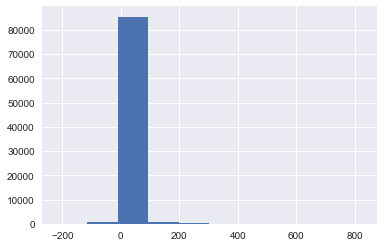

In [112]:
plt.hist(basename_clean['att_median1'][basename_clean['att_median1'].notnull()])
plt.show()

In [115]:
# import seaborn as sns
sns.set()

# Load the example tips dataset
# iris = sns.load_dataset("basename_clean")

# Plot tip as a function of toal bill across days
g = sns.lmplot(x='house_price', y="rg", hue="att_median1",
               truncate=True, size=5, data=basename_clean);

# # Use more informative axis labels than are provided by default
# g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")
# plt.show()

ValueError: low >= high

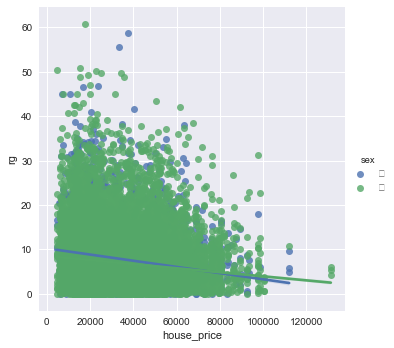

In [95]:
g
plt.show()

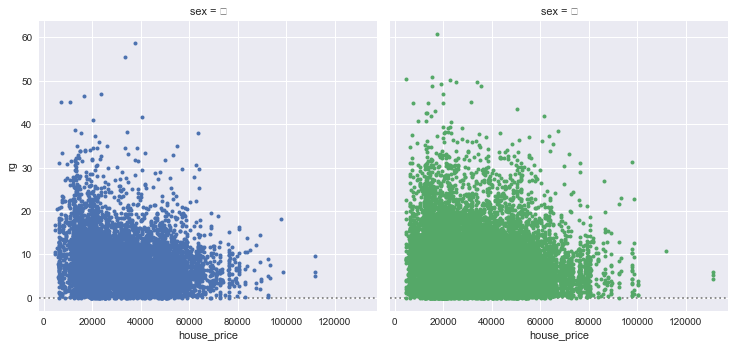

In [118]:
df=basename_clean[["house_price", "rg", "sex"]]

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="sex", hue="sex", col_wrap=5, size=5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "house_price", "rg", marker="o",linestyle = '', ms=4)

# Adjust the tick positions and labels
# grid.set(xticks=np.arange(5), yticks=[-3, 3],
#          xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=1)
plt.show()

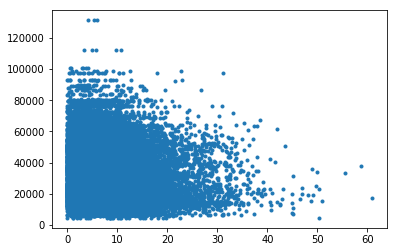

In [47]:
plt.plot(basename_clean['rg'],basename_clean['house_price'],'.')
plt.show()

In [35]:
basename_clean['intercept']=1

In [81]:
reg = smf.ols('rg ~ house_price',
               data = basename_clean).fit()
# call_duration_m + sex +  
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rg   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     967.1
Date:                Wed, 06 Jun 2018   Prob (F-statistic):          3.90e-210
Time:                        11:50:16   Log-Likelihood:            -1.4117e+05
No. Observations:               45764   AIC:                         2.824e+05
Df Residuals:                   45762   BIC:                         2.824e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.8953      0.060    148.209      0.000       8.778       9.013
house_price -5.137e-05   1.65e-06    -31.099      0.000   -5.46e-05   -4.81e-05
==============================================================================
Omnibus:                    16634.744   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82646.536
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                       8.637   Cond. No.                     8.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
basename_clean['sex']=basename_clean['sex'].replace(['男','女'],[0,1])

In [44]:
# basename_clean['att_median'] = basename_clean['att_median'].fillna(basename_clean['att_median'].median())

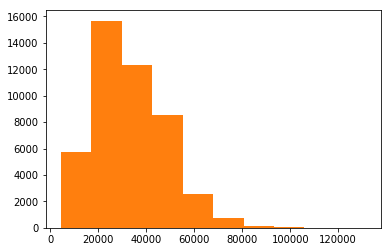

In [55]:
# plt.hist(np.log(basename_clean.att_median+10**-10))
plt.hist(basename_clean['house_price'][basename_clean.house_price.notnull()])
plt.show()

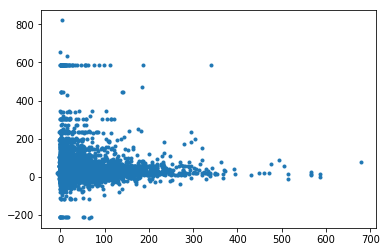

In [62]:
plt.plot(basename_clean['loc_median'],basename_clean['att_median'],'.')
plt.show()

In [23]:
def probability_distribution_function(x, label):
    countdict = Counter(x)
    for key in countdict.keys():
        countdict[key] /= float(len(x))
    print(np.sum(list(countdict.values())))
    plt.plot(list(countdict.keys()), list(countdict.values()),'.', alpha=0.5, label=label)
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$P_{x}$', fontsize=20)
    plt.legend()
    plt.title('$Probability\,Distribution$', fontsize=20)
#     plt.show()
    plt.savefig('./picture/entropy.png',dpi=100)


probability_distribution_function(sorted([np.round(i, 1) for i in basename_clean['AE']]), 'S')
probability_distribution_function(sorted([np.round(i, 1) for i in basename_clean['E']]), 'Sunc')
probability_distribution_function(sorted([math.log(i, 2) for i in basename_clean['N']]), 'Srand')
# probability_distribution_function(sorted([np.round(i, 1) for i in basename_clean['rg']]), 'rg')

1.0
1.0
1.0


In [27]:
def probability_distribution_function1(x, label):
    countdict = Counter(x)
    for key in countdict.keys():
        countdict[key] /= float(len(x))
    print(np.sum(list(countdict.values())))
    plt.plot(list(countdict.keys()), list(countdict.values()),'.', alpha=0.5, label=label)
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$P_{x}$', fontsize=20)
    plt.legend()
    plt.title('$Probability\,Distribution$', fontsize=20)
#     plt.show()
    plt.savefig('./picture/A_entropy.png',dpi=100)


probability_distribution_function1(sorted([np.round(i, 1) for i in basename_clean['A_AE']]), 'S')
probability_distribution_function1(sorted([np.round(i, 1) for i in basename_clean['A_E']]), 'Sunc')
probability_distribution_function1(sorted([math.log(i, 2) for i in basename_clean['A_N']]), 'Srand')

1.0
1.0
1.0


In [33]:
reg = smf.ols('rg ~ house_price+terminal_price+fees+loc_median+att_median+N+E+AE+A_N+A_E+A_AE',
               data = basename_clean).fit()
# call_duration_m + sex +  
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rg   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     808.1
Date:                Tue, 05 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:15:12   Log-Likelihood:                -74292.
No. Observations:               25484   AIC:                         1.486e+05
Df Residuals:                   25472   BIC:                         1.487e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.9733      0.185     32.321      0.000       5.611       6.336
house_price    -7.162e-05    1.9e-06    -37.641      0.000   -7.53e-05   -6.79e-05
terminal_price    -0.0003   2.41e-05    -12.032      0.000      -0.000      -0.000
fees              -0.0016      0.000     -4.147      0.000      -0.002      -0.001
loc_median        -0.0626      0.001    -42.449      0.000      -0.066      -0.060
att_median         0.0017      0.002      0.960      0.337      -0.002       0.005
N                  0.0166      0.001     16.602      0.000       0.015       0.019
E                  1.3889      0.059     23.482      0.000       1.273       1.505
AE                 0.5719      0.061      9.370      0.000       0.452       0.692
A_N               -0.0274      0.006     -4.723      0.000      -0.039      -0.016
A_E               -0.0473      0.104     -0.453      0.651      -0.252       0.157
A_AE               0.9068      0.103      8.763      0.000       0.704       1.110
==============================================================================
Omnibus:                    13177.587   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113342.885
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                      12.206   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
basename_clean=pd.read_csv('./basename_clean.csv')

house=basename_clean[basename_clean['house_price'].astype('str')!='nan']
terminal=basename_clean[basename_clean['terminal_price'].astype('str')!='nan']



high_house=house.sort_values(by=['house_price'],ascending=False)[:int(len(house)*0.20)]['user_id'].values
high_terminal=terminal.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(terminal)*0.20)]['user_id'].values


high=set(high_house)&set(high_terminal)#&set(high_fees)

high_df=basename_clean.loc[basename_clean['user_id'].isin(high)].index

basename_clean.ix[high_df,'type']=1



# len(high)

low_house=house.sort_values(by=['house_price'],ascending=False)[int(len(house)*0.80):-1]['user_id'].values
low_terminal=terminal.sort_values(by=['terminal_price'],ascending=False)[int(len(terminal)*0.80):-1]['user_id'].values
# low_fees=fees.sort_values(by=['fees'],ascending=False)[int(len(fees)*0.50):-1]['user_id'].values

low=set(low_house)&set(low_terminal)


# len(low)

low=set(low_house)&set(low_terminal)#&set(high_fees)
low_df=basename_clean.loc[basename_clean['user_id'].isin(low)].index

basename_clean.ix[low_df,'type']=0



select_users=basename_clean.loc[basename_clean['user_id'].isin(set(high)|set(low))]


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [4]:
select_users['intercept']=1

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
select_users=select_users[['type','user_id','intercept','rg','loc_median','att_median','N','E','AE','A_N','A_E','A_AE']].dropna(axis=0,how='any')

In [12]:
select_users[select_users['type']==1]['N'].describe()

count    1716.000000
mean        5.386897
std         1.054429
min         1.000000
25%         4.754888
50%         5.491853
75%         6.087463
max         8.607330
Name: N, dtype: float64

In [13]:
select_users[select_users['type']==0]['N'].describe()

count    1227.000000
mean        4.961540
std         1.394028
min         1.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         8.836050
Name: N, dtype: float64

In [6]:
select_users['N']=select_users['N'].apply(lambda x:math.log(x, 2))
select_users['A_N']=select_users['A_N'].apply(lambda x:math.log(x, 2))

In [57]:
len(select_users)

2943

In [72]:
y=select_users['type'].values
user_list=select_users['user_id'].values
x=select_users[['intercept','rg','loc_median','att_median','N','E','AE','A_N','A_E','A_AE']]

logit = sm.Logit(y, x)
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print(result.summary())
print( "odds ratios:")
print( np.exp(result.params))
###Goodness of fit checks

formula = "y ~ rg+loc_median+att_median+N+E+AE+A_N+A_E+A_AE"
logit = smf.glm(formula=formula, data=x, family=sm.families.Binomial())
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print ( "Deviance stats",1 - stats.chi2.cdf(result.deviance, result.df_resid))

Optimization terminated successfully.
         Current function value: 0.414164
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2943
Model:                          Logit   Df Residuals:                     2933
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Jun 2018   Pseudo R-squ.:                  0.3903
Time:                        17:40:40   Log-Likelihood:                -1218.9
converged:                       True   LL-Null:                       -1999.1
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.1884      0.335    -12.494      0.000      -4.845      -3.531
rg            -0.1916      0.

In [30]:
y=select_users['type'].values
user_list=select_users['user_id'].values
x=select_users[['intercept','N','rg','E','AE','A_N','A_E','A_AE']]

# 
logit = sm.Logit(y, x)
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print(result.summary())
print( "odds ratios:")
print( np.exp(result.params))
###Goodness of fit checks

formula = "y ~ rg+N+E+AE+A_N+A_E+A_AE"
logit = smf.glm(formula=formula, data=x, family=sm.families.Binomial())
result=logit.fit(cov_type='cluster',cov_kwds={'groups': user_list})
print ( "Deviance stats",1 - stats.chi2.cdf(result.deviance, result.df_resid))

Optimization terminated successfully.
         Current function value: 0.439523
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2943
Model:                          Logit   Df Residuals:                     2935
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Jun 2018   Pseudo R-squ.:                  0.3530
Time:                        09:53:02   Log-Likelihood:                -1293.5
converged:                       True   LL-Null:                       -1999.1
                                        LLR p-value:                1.454e-300
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.9528      0.315     -9.374      0.000      -3.570      -2.335
N             -0.2677      0.